# Image Classifier

---

Imported Libraries

In [33]:
# Data processing
# ==================================================================================
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import os

# Charts
# ==================================================================================
import matplotlib.pyplot as plt

# TensorFlow and Keras imports
# ==================================================================================
from tensorflow import keras
from keras.preprocessing import image
from keras.preprocessing.image import load_img, img_to_array, array_to_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Input
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import load_model

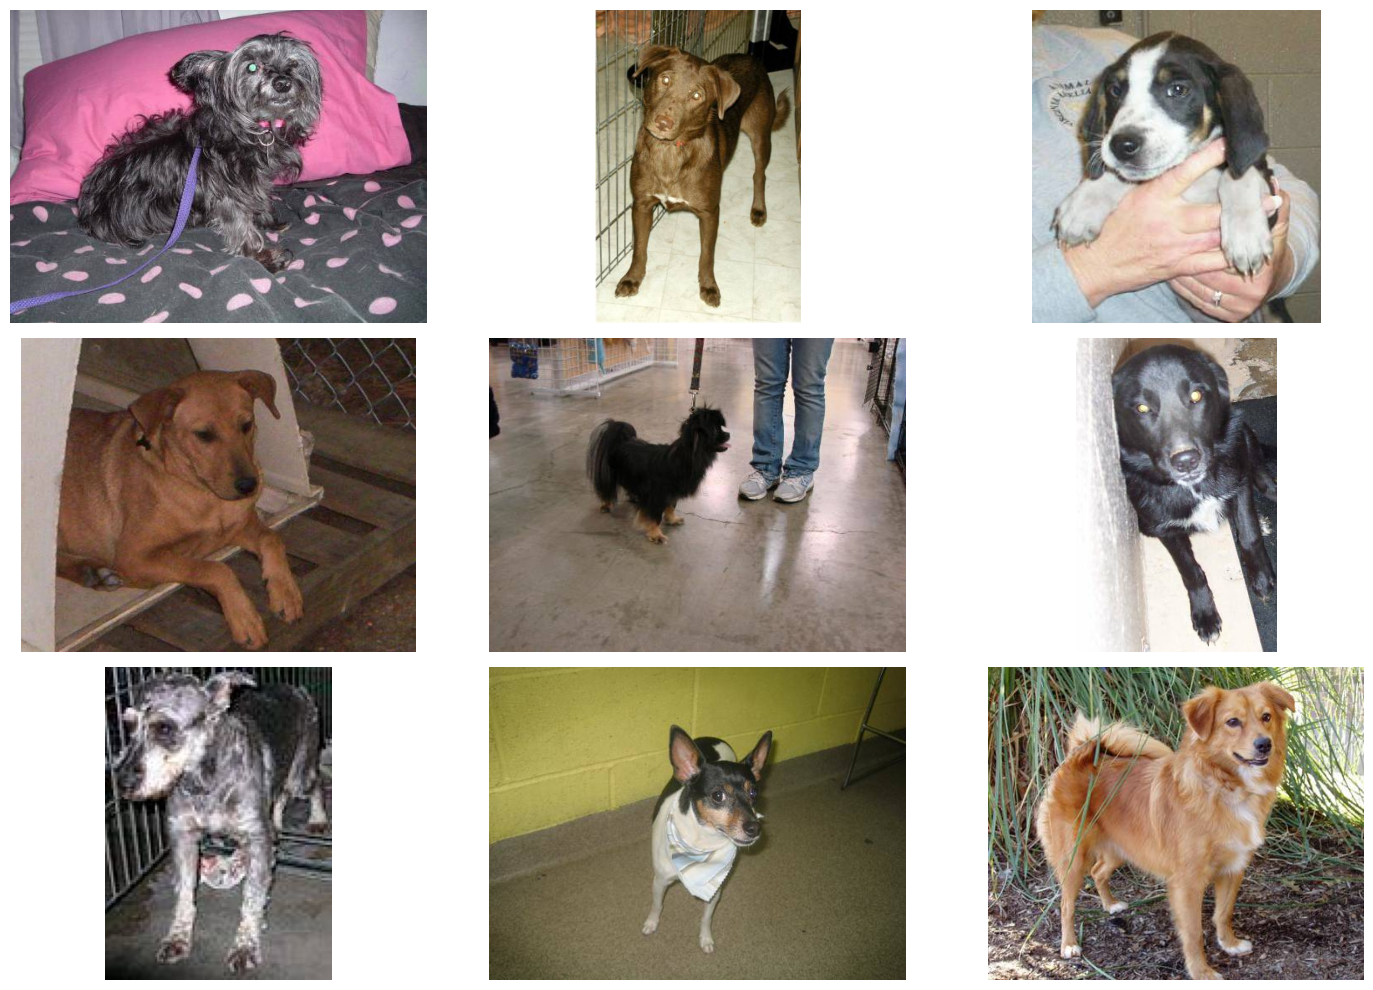

In [34]:
# Definimos la ruta del directorio de train
train_path = "../data/raw/train"
train_dogs = f"{train_path}/dogs"

# Obtenemos la lista de archivos en el subdirectorio de perros
dog_files = [file for file in os.listdir(train_dogs)]

# Lista para almacenar las imágenes procesadas
dog_images = []


for file in dog_files[:9]: # Solo los primeros 9 archivos

    # Cargamos la imagen y la convertimos en un array
    img_array = image.img_to_array(image.load_img(f"{train_dogs}/{file}"))
    img_array /= 255.0 # Normalizamos los valores de píxeles al rango [0, 1]
    dog_images.append(img_array) # Añadimos imagen procesada a la lista


plt.figure(figsize = (15, 10))

# Iteramos sobre las 9 imágenes
for i in range(9):
    plt.subplot(3, 3, i + 1) # creamos subplots (3filas, 3columnas)
    plt.imshow(dog_images[i]) # mostramos la imagen en el subplot correspondiente
    plt.axis("off")

plt.tight_layout()

plt.show()

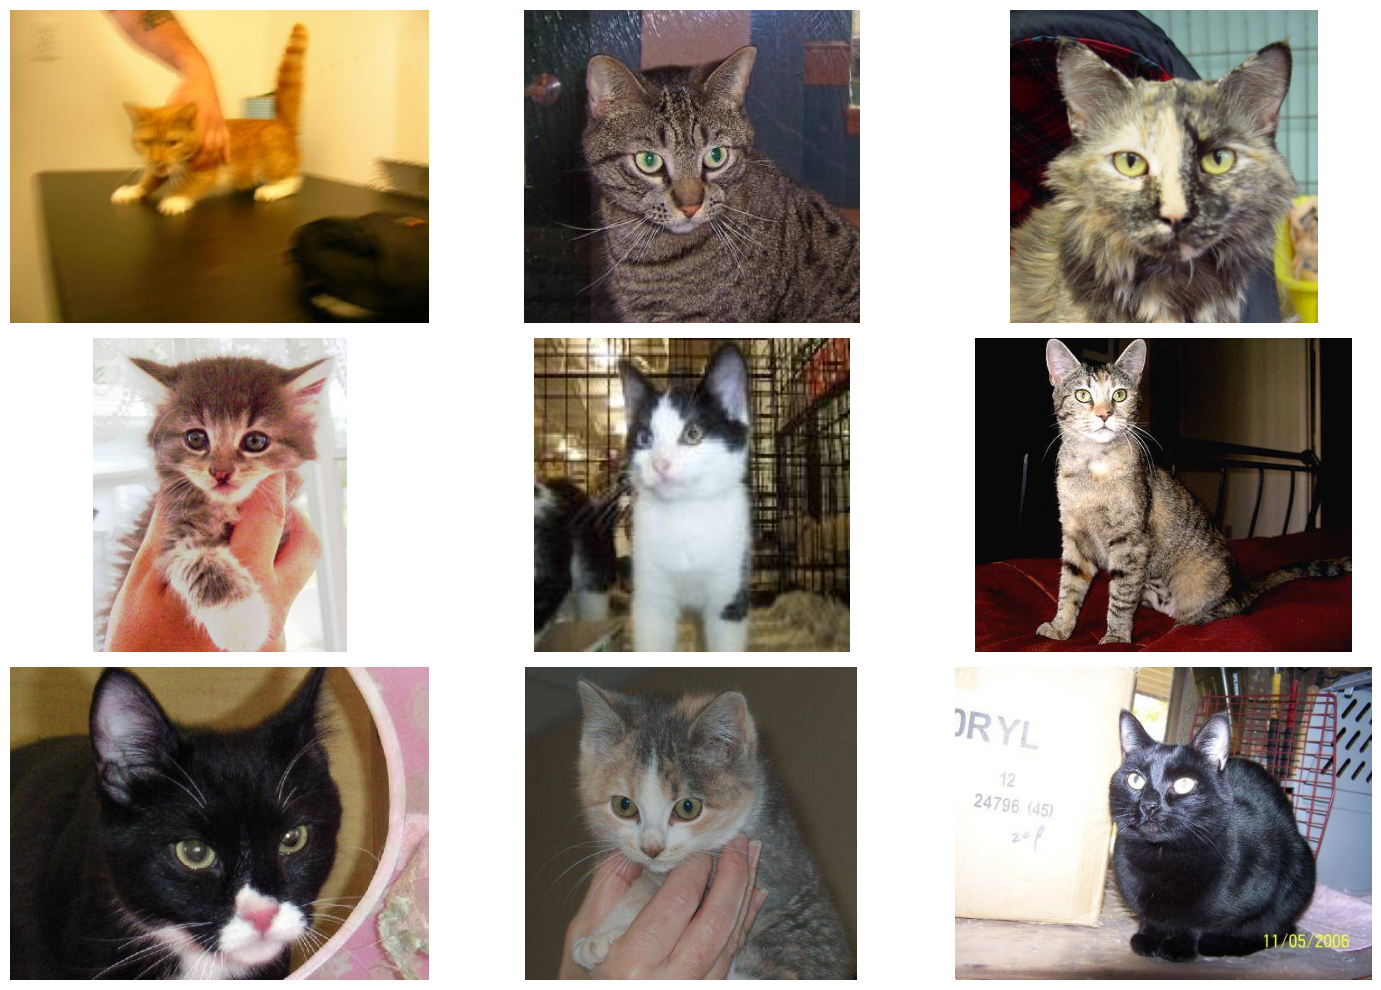

In [35]:
# Definimos la ruta del directorio train
train_cats = f"{train_path}/cats"

# Obtenemos la lista de archivos en el subdirectorio de perros
cat_files = [file for file in os.listdir(train_cats)]

# Lista para almacenar las imágenes procesadas
cat_images = []

for file in cat_files[:9]: # Solo los primeros 9 archivos

    # Cargamos la imagen y la convertimos en un array
    img_array = image.img_to_array(image.load_img(f"{train_cats}/{file}"))
    img_array /= 255.0 # Normalizamos los valores de píxeles al rango [0, 1]
    cat_images.append(img_array) # Añadimos imagen procesada a la lista

plt.figure(figsize = (15, 10))

# Iteramos sobre las 9 imágenes
for i in range(9):
    plt.subplot(3, 3, i + 1) # creamos subplots (3filas, 3columnas)
    plt.imshow(cat_images[i]) # mostramos la imagen en el subplot correspondiente
    plt.axis("off")


plt.tight_layout()

plt.show()

In [36]:
# Creamos un generador de datos de imágenes sin aplicar transformaciones (por ahora está vacío)
datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()

# Generamos datos de train desde el directorio especificado
train = datagentrain.flow_from_directory(
    train_path, # Ruta del directorio de train
    target_size = (200, 200), # Tamaño al que se redimensionan las imágenes
    classes = ['dogs', 'cats'],
    batch_size = 8, # Cantidad de imágenes por lote
    class_mode = 'sparse' # Tipo de etiqueta: retorna índices como valores numéricos para las clases
)

# Definimos la ruta del directorio de test
test_path = "../data/raw"

# Generamos datos de prueba desde el directorio especificado
test = datagentest.flow_from_directory(
    test_path, # Ruta del directorio de test
    target_size = (200, 200), # Tamaño al que se redimensionan las imágenes
    classes = ['test1'],
    batch_size = 8, # Cantidad de imágenes por lote
    class_mode = 'sparse' # Tipo de etiqueta: retorna índices como valores numéricos para las clases
)

Found 25000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


---

## **Model Training** 

### CNN (Convolutional Neural Network)

In [37]:
# Creación de un modelo secuencial
model = Sequential()

# Capa de entrada: define el tamaño de entrada de las imágenes (200x200 píxeles con 3 canales para RGB)
model.add(Input(shape = (200,200,3)))

# Primer bloque de convolución
#//////////////////////////////
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu")) # Primera capa convolucional
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu")) # Segunda capa convolucional

# Primera capa de max-pooling
#-------------------------------------------------------------------------------------------------------------------------
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2))) # Reduce las dimensiones espaciales a la mitad

# Segundo bloque de convolución
#//////////////////////////////
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu")) # Tercera capa convolucional
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu")) # Cuarta capa convolucional

# Segunda capa de max-pooling
#-------------------------------------------------------------------------------------------------------------------------
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))

# Tercer bloque de convolución
#//////////////////////////////
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu")) # Quinta capa convolucional
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu")) # Sexta capa convolucional
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu")) # Séptima capa convolucional

# Tercera capa de max-pooling
#-------------------------------------------------------------------------------------------------------------------------
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))

# Cuarto bloque de convolución
#//////////////////////////////
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu")) # Octava capa convolucional
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu")) # Novena capa convolucional
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu")) # Décima capa convolucional

# Cuarta capa de max-pooling
#-------------------------------------------------------------------------------------------------------------------------
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))

# Quinto bloque de convolución
#//////////////////////////////
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu")) # Undécima capa convolucional
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu")) # Duodécima capa convolucional
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu")) # Decimotercera capa convolucional

# Quinta capa de max-pooling
#-------------------------------------------------------------------------------------------------------------------------
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))



# Aplanamos las dimensiones espaciales para pasar a capas completamente conectadas
model.add(Flatten())

# Primera capa densa completamente conectada
model.add(Dense(units = 4096,activation = "relu")) # 4096 unidades con activación ReLU

# Segunda capa densa completamente conectada
model.add(Dense(units = 4096,activation = "relu")) # Otra capa con 4096 unidades

# Capa de salida
model.add(Dense(units = 2, activation = "softmax")) # Dos unidades (perro y gato) con activación softmax para clasificación

In [38]:
model.compile(loss = 'sparse_categorical_crossentropy', # adecuada para problemas de clasificación multicategoría donde las etiquetas son valores enteros 
               optimizer = Adam(learning_rate = 0.001), # (Adaptive Moment Estimation)
                 metrics = ["accuracy"]) # Especificamos las métricas que usaremos para evaluar el modelo durante el entrenamiento y la validación

In [39]:
model.fit(train, epochs=1)

c:\Users\fermin\anaconda3\envs\deep_learning_env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3125/3125 ━━━━━━━━━━━━━━━━━━━━ 3208s 1s/step - accuracy: 0.5057 - loss: 21.5068


In [40]:
checkpoint = ModelCheckpoint("../models/cnn_model.keras", monitor = "val_accuracy", verbose = 1, save_best_only = True, save_weights_only = False, mode = "auto")
early = EarlyStopping(monitor = "val_accuracy", patience = 3, verbose = 1, mode = "auto")
hist = model.fit(train, steps_per_epoch = 100, validation_data = test, validation_steps = 10, epochs = 7, callbacks = [checkpoint, early])

Epoch 1/7
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 880ms/step - accuracy: 0.4801 - loss: 0.6934
Epoch 1: val_accuracy improved from -inf to 0.00000, saving model to ../models/cnn_model.keras
100/100 ━━━━━━━━━━━━━━━━━━━━ 93s 933ms/step - accuracy: 0.4801 - loss: 0.6934 - val_accuracy: 0.0000e+00 - val_loss: 0.6943
Epoch 2/7
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 913ms/step - accuracy: 0.4685 - loss: 0.6932
Epoch 2: val_accuracy did not improve from 0.00000
100/100 ━━━━━━━━━━━━━━━━━━━━ 94s 938ms/step - accuracy: 0.4687 - loss: 0.6932 - val_accuracy: 0.0000e+00 - val_loss: 0.6961
Epoch 3/7
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 905ms/step - accuracy: 0.5304 - loss: 0.6931
Epoch 3: val_accuracy did not improve from 0.00000
100/100 ━━━━━━━━━━━━━━━━━━━━ 93s 930ms/step - accuracy: 0.5303 - loss: 0.6931 - val_accuracy: 0.0000e+00 - val_loss: 0.7012
Epoch 4/7
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 906ms/step - accuracy: 0.5564 - loss: 0.6919
Epoch 4: val_accuracy did not improve from 0.00000
100/100 ━━━━━━━━━━━━━━━━━━━━ 93s

In [41]:
model.save("../models/cnn_model.keras")

>NOTE: El modelo no funciona porque el val_accuracy es = 0. ¿Por qué no aumenta?

---

**Results**

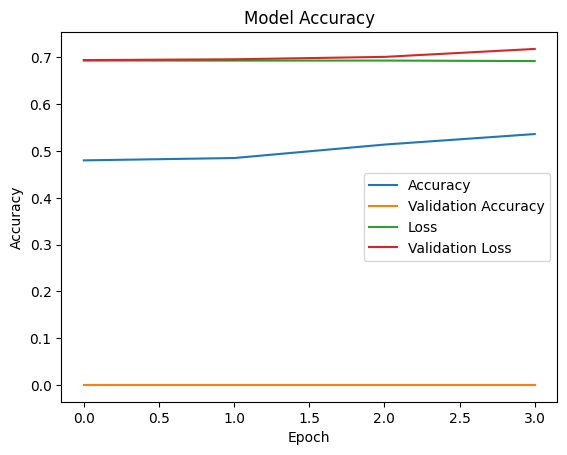

In [42]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Validation Accuracy", "Loss", "Validation Loss"])

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
dog


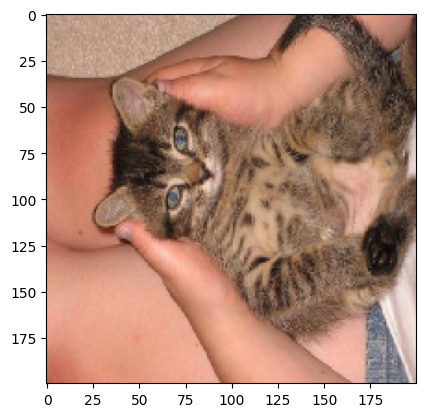

In [44]:

img = image.load_img("../data/raw/test1/6.jpg", target_size = (200, 200))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis = 0)
saved_model = load_model("../models/cnn_model.keras")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print("dog")